# <center>Experiment 8</center> 

<br>
Chirag Rana<br>
UID: 2018130043<br>

**Objective**: Understanding Support Vector Machine algorithm through building SVM algorithm in Python.


In [2]:
# Libraries
import pandas as pd 
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

%matplotlib inline

In [3]:
# We'll define a function to draw a nice plot of an SVM
def plot_svc(svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max)) 
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

    plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
    # Support vectors indicated in plot by vertical lines
    sv = svc.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c='k', marker='x', s=100, linewidths=1) 
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max) 
    plt.xlabel('X1')
    plt.ylabel('X2') 
    plt.show()
    print('Number of support vectors: ', svc.support_.size)


In [4]:
# Generating random data: 20 observations of 2 features and divide into tw
np.random.seed(5)
X = np.random.randn(20,2) 
y = np.repeat([1,-1], 10)
X[y == -1] = X[y == -1] +1

Text(0, 0.5, 'X2')

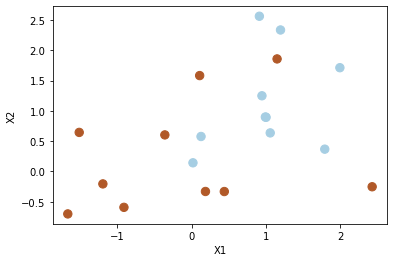

In [5]:
plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired) 
plt.xlabel('X1')
plt.ylabel('X2')

The given Random dataset is non-linear.

In [6]:
svc = SVC(C=1, kernel='linear') 
svc.fit(X, y)

SVC(C=1, kernel='linear')

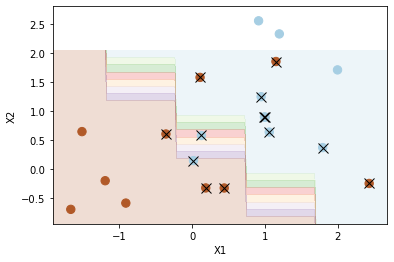

Number of support vectors:  13


In [7]:
plot_svc(svc, X, y)

In [8]:
svc.support_

array([10, 11, 13, 14, 15, 16, 17,  0,  1,  2,  4,  6,  8])

* What if we instead used a smaller value of the cost parameter?<br>
Ans) We get a larger number of support vectors

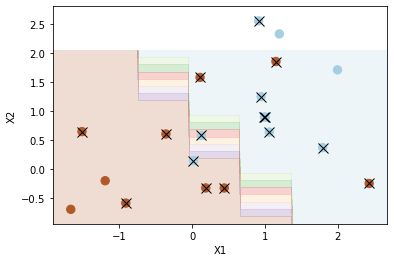

Number of support vectors:  16


In [9]:
svc2 = SVC(C=0.1, kernel='linear') 
svc2.fit(X, y)
plot_svc(svc2, X, y)

In [10]:

# Select the optimal C parameter by cross-validation
tuned_parameters = [{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}]
clf = GridSearchCV(SVC(kernel='linear'), tuned_parameters, cv=10, scoring= 'accuracy')
clf.fit(X, y)


GridSearchCV(cv=10, estimator=SVC(kernel='linear'),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}],
             scoring='accuracy')

In [11]:
clf.cv_results_    

{'mean_fit_time': array([0.00112288, 0.00157712, 0.00143464, 0.0012676 , 0.00088558,
        0.00080214, 0.00076661]),
 'std_fit_time': array([0.00070508, 0.00180739, 0.00136612, 0.00052902, 0.00050972,
        0.00040121, 0.00040737]),
 'mean_score_time': array([0.00075295, 0.0001992 , 0.00060315, 0.00036855, 0.00024753,
        0.00040624, 0.00030718]),
 'std_score_time': array([0.00084744, 0.0003984 , 0.00039856, 0.00052888, 0.00040593,
        0.00077112, 0.0004501 ]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 5, 10, 100],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 5},
  {'C': 10},
  {'C': 100}],
 'split0_test_score': array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
 'split1_test_score': array([0.5, 0.5, 0.5, 0. , 0. , 0. , 0. ]),
 'split2_test_score': array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
 'split3_test_score': array([1

In [12]:
clf.best_params_

{'C': 0.001}

In [13]:
np.random.seed(1)
X_test = np.random.randn(20,2) 
y_test = np.random.choice([-1,1], 20)
X_test[y_test == 1] = X_test[y_test == 1] -1


In [14]:
svc2 = SVC(C=0.001, kernel='linear') 
svc2.fit(X, y)
y_pred = svc2.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_pred), index=svc2.classes_, columns= ['y_pred', 'y_test'])

,y_pred,y_test
-1,2,6
1,0,12


Text(0, 0.5, 'X2')

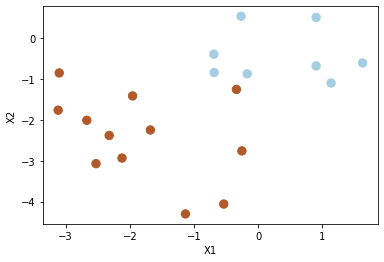

In [15]:
X_test[y_test == 1] = X_test[y_test == 1] -1
plt.scatter(X_test[:,0], X_test[:,1], s=70, c=y_test, cmap=mpl.cm.Paired) 
plt.xlabel('X1')
plt.ylabel('X2')


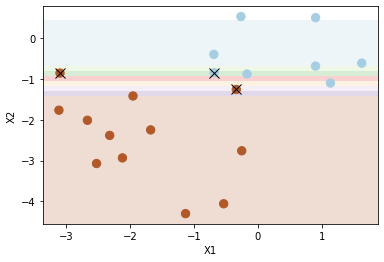

Number of support vectors:  3


In [16]:
svc3 = SVC(C=1e5, kernel='linear') 
svc3.fit(X_test, y_test) 
plot_svc(svc3, X_test, y_test)

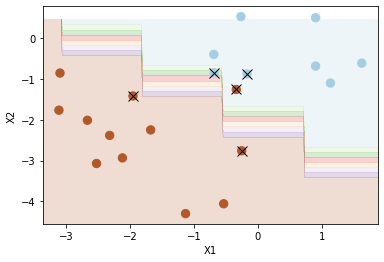

Number of support vectors:  5


In [17]:
 svc4 = SVC(C=1, kernel='linear') 
 svc4.fit(X_test, y_test) 
 plot_svc(svc4, X_test, y_test)

Inference: Increasing the penalty parameter "C" gave a better fitted classifier as it increaes the flexibility of the model to adapt the data.

Text(0, 0.5, 'X2')

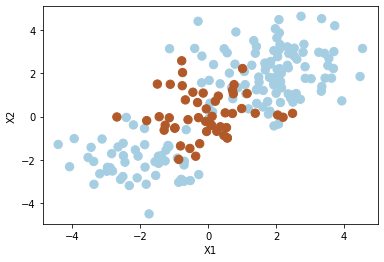

In [18]:
from sklearn.model_selection import train_test_split 
np.random.seed(8)
X = np.random.randn(200,2)
X[:100] = X[:100] +2
X[101:150] = X[101:150] -2
y = np.concatenate([np.repeat(-1, 150), np.repeat(1,50)])
 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired) 
plt.xlabel('X1')
plt.ylabel('X2')


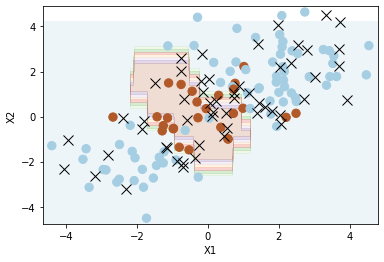

Number of support vectors:  54


In [19]:
svm = SVC(C=1.0, kernel='rbf', gamma=1) 
svm.fit(X_train, y_train)
plot_svc(svm, X_test, y_test)


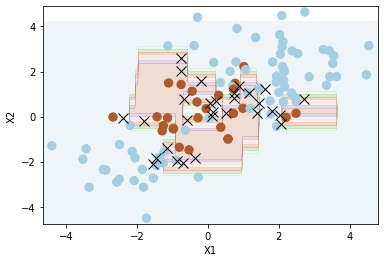

Number of support vectors:  29


In [20]:
# Increasing C parameter, allowing more flexibility 
svm2 = SVC(C=100, kernel='rbf', gamma=1.0) 
svm2.fit(X_train, y_train)
plot_svc(svm2, X_test, y_test)


In [21]:
tuned_parameters = [{'C': [0.01, 0.1, 1, 10, 100],'gamma': [0.5, 1,2,3,4]}]
clf = GridSearchCV(SVC(kernel='rbf'), tuned_parameters, cv=10, scoring='accuracy') 
clf.fit(X_train, y_train)
clf.best_params_ 


{'C': 1, 'gamma': 0.5}

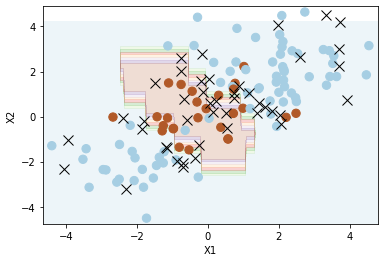

Number of support vectors:  44
[[72  2]
 [12 14]]
0.86


In [22]:
plot_svc(clf.best_estimator_, X_test, y_test) 
print(confusion_matrix(y_test, clf.best_estimator_.predict(X_test))) 
print(clf.best_estimator_.score(X_test, y_test))

Inference: In radial basis function, we have non-linear classifier using 3 Dimensional hyperplace to separate 2 classes on a 2D plane. Here, we can see that the central class (brown) is projected on the top of the rbf function and remaining away from the center on the bottom part. Then a 3D plane separates the 2 classes giving the above results.

In [23]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [24]:
from sklearn.metrics import roc_curve, auc

In [25]:
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

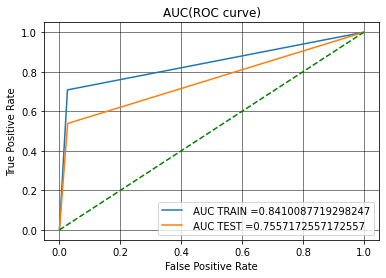

In [26]:
plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

## Conclusion:
* Understood how SVM works. 
* How the hyper parameters can be tweaked to make the performance better.